In [1]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

# Gaussian kernels

![](img/gaussian.png)

In [2]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(- np.power(x1-x2, 2).sum() / (2*sigma**2))

In [3]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

## load data

In [4]:
mat = sio.loadmat('./data/ex6data2.mat')
print(mat.keys())

data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')
data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [5]:
data.shape

(863, 3)

## visualize data

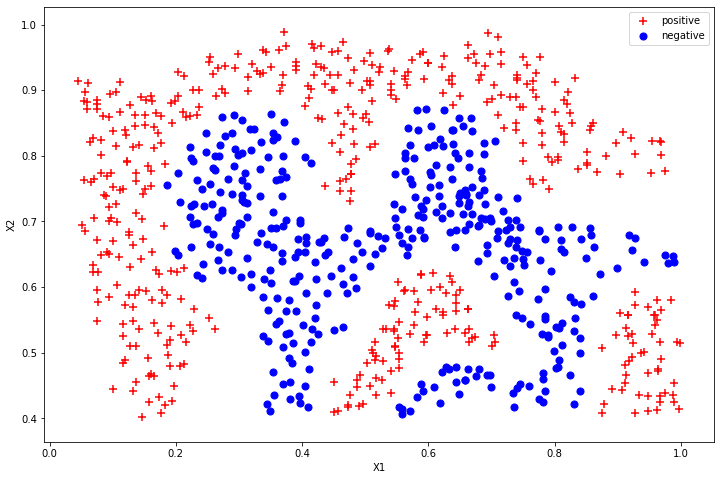

In [6]:
positive = data[data.y == 1]
negative = data[data['y'] == 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+', c='r')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

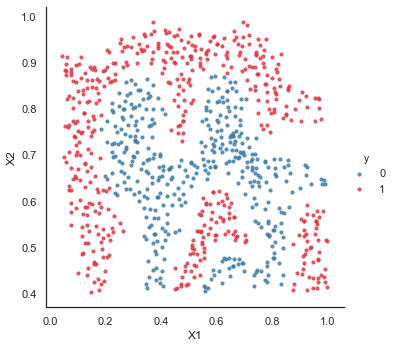

In [7]:
sns.set(context='notebook', style='white', palette=sns.diverging_palette(240, 10, n=2), color_codes=False)
sns.lmplot('X1', 'X2', hue='y', data=data, height=5, fit_reg=False, scatter_kws={'s': 10})
plt.show()

## sklearn.svm use gaussian kernel


[sklearn.svm.SVC¶](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

![](img/rbf_kernel.png)

### try gamma = 1

gamma和sigma成反比，gamma越小即sigma越大，gaussian kernek越"胖"，模型越容易under fitting。

In [8]:
svc1 = sklearn.svm.SVC(C=100, kernel='rbf', gamma=1, probability=True)
svc1

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [9]:
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

0.8342989571263036

## decision boundary

In [10]:
min(data['X1']), max(data['X1']), min(data['X2']), max(data['X2'])

(0.0449309, 0.998848, 0.402632, 0.988596)

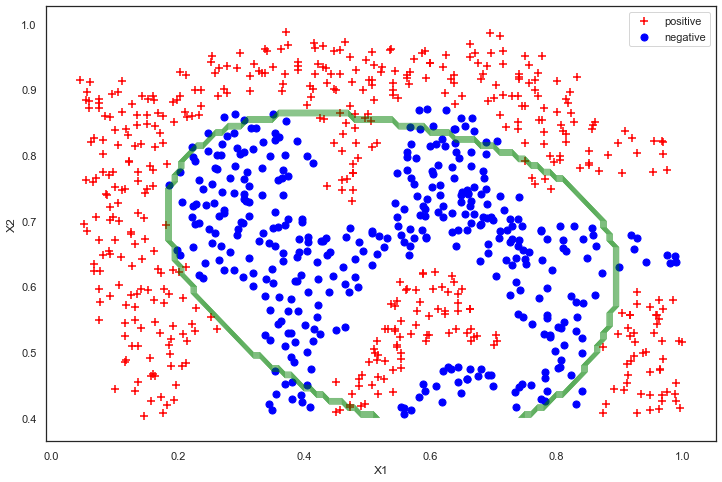

In [11]:
positive = data[data.y == 1]
negative = data[data['y'] == 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+', c='r')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# 决策边界, 使用等高线表示
x1 = np.arange(0.04, 1, 0.01)
x2 = np.arange(0.4, 1, 0.01)
x1, x2 = np.meshgrid(x1, x2)
y_pred = np.array([svc1.predict(np.vstack((a, b)).T) for (a, b) in zip(x1, x2)])
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

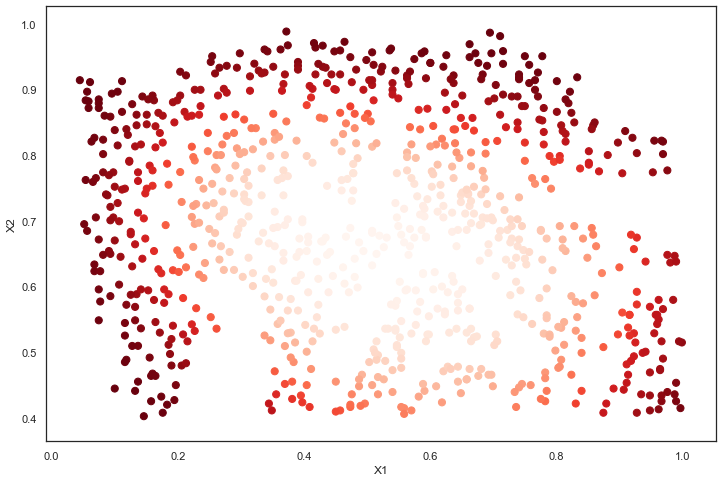

In [12]:
# predict_proba = svc.predict_proba(data[['X1', 'X2']])[:, 0]
predict_proba = svc1.predict_proba(data[['X1', 'X2']])[:, 1]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X1'], data['X2'], s=50, c=predict_proba, cmap='Reds')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.show()

### try gamma = 10

gamma和sigma成反比，gamma越大即sigma越小，gaussian kernek越"瘦"，模型越容易over fitting。

In [13]:
svc10 = sklearn.svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)
svc10.fit(data[['X1', 'X2']], data['y'])
svc10.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

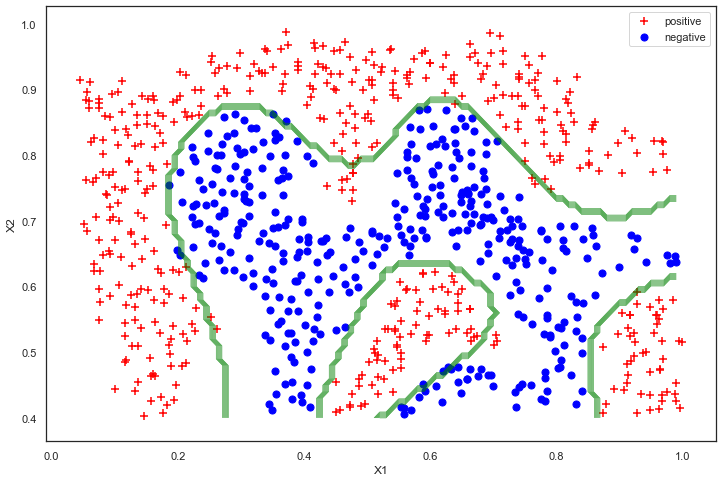

In [14]:
positive = data[data.y == 1]
negative = data[data['y'] == 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+', c='r')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# 决策边界, 使用等高线表示
x1 = np.arange(0.04, 1, 0.01)
x2 = np.arange(0.4, 1, 0.01)
x1, x2 = np.meshgrid(x1, x2)
y_pred = np.array([svc10.predict(np.vstack((a, b)).T) for (a, b) in zip(x1, x2)])
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

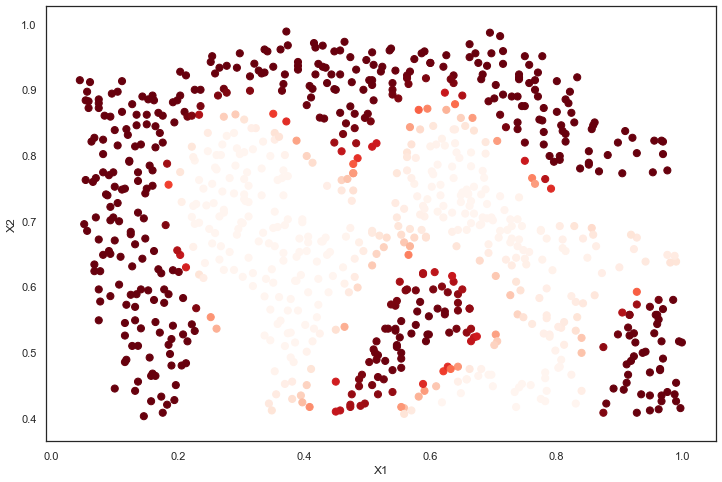

In [15]:
# predict_proba = svc.predict_proba(data[['X1', 'X2']])[:, 0]
predict_proba = svc10.predict_proba(data[['X1', 'X2']])[:, 1]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X1'], data['X2'], s=50, c=predict_proba, cmap='Reds')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.show()